This is the Python code used to analyze 9.6 million tweets from troll accounts identified by Twitter.

The tweets need to be downloaded from [Twitter's data integrity site](https://about.twitter.com/en_us/values/elections-integrity.html#data).

The following libraries are needed ro run the code:
* pandas
* numpy
* matplotlib


First, load necessary libraries and set display options

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob

pd.set_option('display.width', 2200)
pd.set_option('display.max_colwidth', 500)

I placed the data files into folders for each country origin and made that folder name a column. I exluded one Venezuelan data file because it wasn't loading. It is possibly corruted somewhere inside.

This code reads each file in the folder and merges them into one monster dataset.

In [12]:
folders = ['Russia', 'Iran', 'Venezuela', 'Bangladesh']

all_data = []

for folder in folders:
    files = glob.glob(folder + '/*.csv')
    for file in files:
        print(file)
        tmp = pd.read_csv(file, encoding='utf-8', parse_dates = ['account_creation_date', 'tweet_time'])
        tmp['country'] = folder
        all_data.append(tmp)
        
df = pd.concat(all_data)

print('Total tweets loaded:')
print(len(df))

Russia\ira_tweets_csv_hashed.csv


C:\Users\rochar\AppData\Local\Continuum\miniconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (30) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Russia\russian_201901_1_tweets_csv_hashed.csv


C:\Users\rochar\AppData\Local\Continuum\miniconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (29) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Iran\iranian_tweets_csv_hashed.csv
Iran\iran_201901_1_tweets_csv_hashed.csv
Venezuela\venezuela_201901_2_tweets_csv_hashed.csv
Bangladesh\bangladesh_201901_1_tweets_csv_hashed.csv


C:\Users\rochar\AppData\Local\Continuum\miniconda3\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  del sys.path[0]


9653006

Delete variables to clear up memory and save complete data as pickle for faster loading next time

In [13]:
del all_data
del tmp
df.to_pickle('all_troll_tweets.pickle')

In [2]:
df = pd.read_pickle('all_troll_tweets.pickle')

To find tweets about Canada, we need to filter the tweets for uniquely Canadian terms. This is a list of keywords in [regular expression](https://en.wikipedia.org/wiki/Regular_expression) form to search through all the tweets. 

In [3]:
can_words = ['canada', 'canadian', 'trudeau', 'justintrudeau', 'toronto', 'montreal', 'vancouver', 'ottawa', '\Wonpoli\W', 'polqc', 'cdnpoli',
             'canuck', '\Wndp\W', 'scheer', '(the)?jagmeet ?singh', '\Wtopoli\W', 'quebec', 'qcpoli',
             'halifax', 'edmonton', 'calgary', 'alberta', 'ontario', 'winnipeg', 'manitoba', 'saskatchewan', 'british columbia',
            'ezra ?levant', 'therebeltv', 'rob ford', 'doug ford', 'fordnation', 'la ?meute', 'alexandre bissonnette',
            'atalante', 'zeiger', 'alek minassian', 'chrystia freeland', 'cafreeland', 'kathleen[ _]wynne', 
            '\Wcbc\W', 'cbcnews', 'ctvnews', 'globe ?and ?mail', '\Wpostmedia\W', 'keystone ?xl', 'kinder ?morgan', 'trans ?mountain',
            'colten ?boushie', 'boushie', 'settlecollector', 'justiceforcolten', 'oil ?sands', '\Wableg\W', '\Wbcpoli\W', 'energy ?east',
            'barbara[ r]kay', 'candice ?malcolm', 'yellow ?vests? ?(canada)?', 'ontario(is)? ?proud', 'maxime ?bernier', 'fran[çc]ois ?legault',
            'coalition ?avenir', 'liberal_party', 'cpc_hq', '\Wclann\W', 'elizabeth ?may']

can_regex = '(' + '|'.join(can_words) + ')'
can_regex

'(canada|canadian|trudeau|justintrudeau|toronto|montreal|vancouver|ottawa|\\Wonpoli\\W|polqc|cdnpoli|canuck|\\Wndp\\W|scheer|(the)?jagmeet ?singh|\\Wtopoli\\W|quebec|qcpoli|halifax|edmonton|calgary|alberta|ontario|winnipeg|manitoba|saskatchewan|british columbia|ezra ?levant|therebeltv|rob ford|doug ford|fordnation|la ?meute|alexandre bissonnette|atalante|zeiger|alek minassian|chrystia freeland|cafreeland|kathleen[ _]wynne|\\Wcbc\\W|cbcnews|ctvnews|globe ?and ?mail|\\Wpostmedia\\W|keystone ?xl|kinder ?morgan|trans ?mountain|colten ?boushie|boushie|settlecollector|justiceforcolten|oil ?sands|\\Wableg\\W|\\Wbcpoli\\W|energy ?east|barbara[ r]kay|candice ?malcolm|yellow ?vests? ?(canada)?|ontario(is)? ?proud|maxime ?bernier|fran[çc]ois ?legault|coalition ?avenir|liberal_party|cpc_hq|\\Wclann\\W|elizabeth ?may)'

In [10]:
len(can_words)

67

This filters the data for Canadian tweets. It may take a few minutes to complete.

In [4]:
df = df[df.tweet_text.notna()]
cantwt = df[df.tweet_text.str.contains(can_regex, case=False)]
cantwt.tweet_time = pd.to_datetime(cantwt.tweet_time)

print('Number of tweets about Canada:')
print(len(cantwt))

Number of tweets about Canada:
21631


A lot of tweets are cluttered with noise: hashtags, @-mentions and URLs. Strip these out to get the pure tweet text. Then return the 20 most frequent "clean" tweets.

A blank tweet means it only had hashtags, @-mentions and URLs.

In [4]:
cantwt['clean_tweet'] = cantwt.tweet_text.str.replace('(@\w+=?:?|#\w+|https?:.+|RT[ =]*)', '').str.strip()
cantwt.clean_tweet.value_counts().head(20)

                                                                                                      383
Un lien entre recruteur de l'Etat islamique et l'ambassade du Canada en Jordanie s'ébruite            338
Des centaines d'intellectuels dénoncent le soutien d'Ottawa à Israël                                  187
Canada Wants to Take Unvetted Muslim “Refugees” Detained at U.S. Airports                             122
BREAKING : Canada Will Not Allow SINGLE Syrian Men to Seek Refuge                                     121
Justin Trudeau Booed At Town Hall As Polls Show His Horrific Approval Ratings                         109
Canada’s Prime Minister Just Stubbed President Trump In The Back!!!                                   106
Canada to offer temp permits to those stranded by Trump ban                                           105
Canada may contribute to Dutch-led international abortion fund                                        104
Canada FORCED to take DRASTIC Action to Stop I

Export to Excel for easy sharing.

In [553]:
cantwt.to_excel('troll_tweets_canada_new.xlsx')

See how many of tweets have the keywords in the list created.

In [291]:
word_freq = {}

for word in can_words:
    word_freq[word] = len(cantwt[cantwt.tweet_text.str.contains(word, case=False)])
    
sorted(word_freq.items(), key=lambda x: x[1], reverse=True)

C:\Users\rochar\AppData\Local\Continuum\miniconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  


[('canada', 10091),
 ('canadian', 3725),
 ('trudeau', 2493),
 ('toronto', 1345),
 ('quebec', 1212),
 ('ottawa', 718),
 ('justintrudeau', 569),
 ('cdnpoli', 553),
 ('alberta', 529),
 ('ontario', 501),
 ('montreal', 483),
 ('vancouver', 349),
 ('keystone ?xl', 325),
 ('cbcnews', 291),
 ('therebeltv', 266),
 ('ezra ?levant', 246),
 ('calgary', 177),
 ('canuck', 148),
 ('\\Wcbc\\W', 144),
 ('manitoba', 125),
 ('british columbia', 123),
 ('winnipeg', 112),
 ('edmonton', 110),
 ('globe ?and ?mail', 110),
 ('ctvnews', 102),
 ('alexandre bissonnette', 99),
 ('scheer', 98),
 ('halifax', 63),
 ('kinder ?morgan', 62),
 ('rob ford', 55),
 ('\\Wndp\\W', 49),
 ('\\Wbcpoli\\W', 48),
 ('saskatchewan', 42),
 ('\\Wonpoli\\W', 33),
 ('oil ?sands', 24),
 ('la ?meute', 23),
 ('cafreeland', 21),
 ('candice ?malcolm', 19),
 ('polqc', 18),
 ('\\Wableg\\W', 18),
 ('cpc_hq', 16),
 ('liberal_party', 15),
 ('trans ?mountain', 13),
 ('\\Wtopoli\\W', 12),
 ('zeiger', 12),
 ('(the)?jagmeet ?singh', 10),
 ('maxime ?b

Number of tweets by country of origin

In [293]:
cantwt.country.value_counts()

Iran          10836
Russia         6525
Venezuela      4261
Bangladesh        9
Name: country, dtype: int64

Show frequency of tweets by day. Pandas threw an error but the chart still rendered.

NonGuiException: 

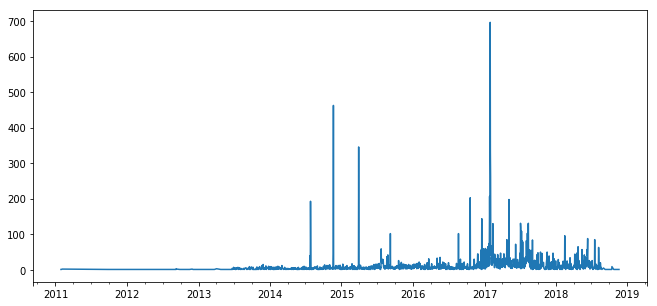

In [295]:
%matplotlib inline

by_day = cantwt.groupby(cantwt.tweet_time.dt.to_period('D')).size()
by_day.plot(figsize=(11,5))

Isolate the 20 top days with the most tweets.

In [315]:
top_days = by_day.sort_values(ascending=False).head(10)
top_days

tweet_time
2017-01-30    697
2014-11-21    463
2015-03-30    346
2017-01-31    332
2017-02-01    264
2017-01-27    207
2016-10-20    203
2017-05-06    198
2014-07-27    193
2016-12-18    144
Freq: D, dtype: int64

The three most tweeted tweets on those days.

In [322]:
# Set aside some columns for easier viewing
cols = ['country', 'user_screen_name', 'tweet_time', 'tweet_text', 
        'clean_tweet', 'follower_count', 'following_count', 'is_retweet', 
        'like_count', 'reply_count', 'retweet_count']

top_day_tweets = cantwt[cantwt.tweet_time.apply(lambda date: date in top_days.index)].sort_values('tweet_time')[cols]

( top_day_tweets.groupby([top_day_tweets.tweet_time.dt.date, 'clean_tweet'])
 .retweet_count
 .sum()
 .reset_index(name='rts')
 .sort_values(['tweet_time', 'rts'], ascending=[1,0])
 .groupby('tweet_time')
 .head(3)
)

,tweet_time,clean_tweet,rts
2,2014-07-27,Gaza you are not alone. Love from .,123.0
1,2014-07-27,Des centaines d'intellectuels dénoncent le soutien d'Ottawa à Israël,58.0
0,2014-07-27,Activist’s Shock Rant at Day Rally,0.0
345,2014-11-21,“:,4.0
49,2014-11-21,"В принципе, Канада-не та страна, на выкрики которой нужно внимание обращать",1.0
113,2014-11-21,Канада где вы нашли такого Бибера???,1.0
353,2015-03-30,Un lien entre recruteur de l'Etat islamique et l'ambassade du Canada en Jordanie s'ébruite,61.0
346,2015-03-30,"Les Relations entre le et les É.-U. sont Orageuses, selon des Experts",0.0
347,2015-03-30,On the Need to Re-Establish Sensible Diplomatic Relations Between and the Islamic Republic of,0.0
529,2016-10-20,We demand to as is hurting th sentiments of millions ppl by his hate speeches,57.0


Some basic stats by country: total number of tweets, number of unique "clean tweets", number of unique accounts, average number of followers, number of unique reported locations.

In [435]:
cantwt.groupby('country').agg({ 'tweetid' : 'count', 
                               'clean_tweet' : 'nunique', 
                               'userid' : 'nunique',
                               'follower_count' : 'mean', 
                               'user_reported_location' : 'nunique'})

,tweetid,clean_tweet,userid,follower_count,user_reported_location
country,,,,,
Bangladesh,9,9,3,1696.888889,2
Iran,10836,6683,1145,7406.101052,100
Russia,6525,5385,607,6693.159693,144
Venezuela,4261,650,417,1091.842760,2


The five accounts by country that tweeted the most.

In [299]:
( cantwt.groupby(['country', 'user_screen_name'])
         .size()
         .reset_index(name='count')
         .sort_values(['country', 'count'], ascending= [1,0])
         .groupby('country')
         .head(5)
)

,country,user_screen_name,count
2,Bangladesh,QGdKV23i9r+ocu2cySQC8J8O0BJmxQLM8n4xB6RQg8=,7
0,Bangladesh,5yP0DlSBuPEQJIOdniuznIo1Roucbu6jVHZNUnHcei0=,1
1,Bangladesh,8hYvkOW7QTWoKSZvoR1Ru5nzEMBVFVskc7xepyhQJBo=,1
771,Iran,cfb431d28838bc87b3473081cc5899cfede8252c2015644ffeccd7b27b1149fb,1484
945,Iran,marialuis91,856
203,Iran,6f2245bc7dd9aa440e83508525b3a79188b4218b2cb662a711701eeadc7c3056,776
573,Iran,RuhidaPTI,488
20,Iran,02c7119c0fab4e8b2c16a2320cd6759f0220477471f1b094fe3e46ce49894c51,438
1436,Russia,CathyTo47590555,1279
1628,Russia,cpGoWRKuWjs4rgU4q2SIgYVvWUMdFkglid14Dd9CQWE=,579


Twitter anonymized the accounts that had less than 5,000 followers by hashing the user name. There are the most active non-hashed accounts.

In [428]:
top_trolls = cantwt[cantwt.user_screen_name.str.len() < 40].user_screen_name.value_counts().head(15)
top_trolls

CathyTo47590555    1279
marialuis91         856
RuhidaPTI           488
SamInfidel          463
Zabeen_Butt         144
RoomOfRumor         115
berniecratss         90
ScreamyMonkey        88
WashingtOnline       67
BarackObama_ir       67
Seattle_Post         63
riseagainstr         54
MeettheNews          45
real_iran            44
DailySanFran         29
Name: user_screen_name, dtype: int64

Here's a sample of their tweets.

In [430]:
cantwt[cantwt.user_screen_name.isin(top_trolls.index)].sample(10)[cols]

,country,user_screen_name,tweet_time,tweet_text,clean_tweet,follower_count,following_count,is_retweet,like_count,reply_count,retweet_count
620342,Russia,CathyTo47590555,2016-06-11 07:52:00,"RT @Ontarible: Trudeau will fail. The Moslems have surfaced, we know how to cut the head off the monster.#BantheQuran #BanShariaLaw https:/…","RT : Trudeau will fail. The Moslems have surfaced, we know how to cut the head off the monster.",8685,1451,True,0.0,0.0,0.0
272504,Russia,CathyTo47590555,2016-08-10 00:09:00,You're a dumb ass lier and an idiot! Go fly some colors in Canada!,You're a dumb ass lier and an idiot! Go fly some colors in Canada!,8685,1451,False,0.0,0.0,0.0
962496,Iran,marialuis91,2014-12-22 18:10:00,@winnipegsun what they will never tell you about Christmas http://t.co/ovd4gGlWLE,what they will never tell you about Christmas,8012,1450,False,0.0,0.0,0.0
935848,Iran,marialuis91,2014-12-23 14:16:00,@CroixRouge_Qc @JdeMontreal ce qu'ils ne vous diront jamais sur Noel http://t.co/QSgH5J9RXT,ce qu'ils ne vous diront jamais sur Noel,8012,1450,False,0.0,0.0,0.0
451591,Iran,marialuis91,2014-06-26 20:53:00,@CWCanadianRight @FoxNews isis was formed by usa in 2012 http://t.co/NvZMhhUG1x,isis was formed by usa in 2012,8012,1450,False,0.0,1.0,0.0
429399,Russia,CathyTo47590555,2015-12-27 22:43:00,RT @RavenHUWolf: #Canada's PM Trudeau hand picked - not only by Progressive Virus Left but by Islam too\n#LiesToldToUs\n#uspol #cdnpoli https…,RT : 's PM Trudeau hand picked - not only by Progressive Virus Left but by Islam too\n\n https…,8685,1451,True,0.0,0.0,0.0
92402,Russia,WashingtOnline,2015-01-11 07:19:00,Ortio earns first NHL shutout as Flames edge Canucks 1-0 #hockey,Ortio earns first NHL shutout as Flames edge Canucks 1-0,40762,14404,False,0.0,0.0,0.0
2213010,Iran,RuhidaPTI,2018-02-15 12:06:00,Dear @JustinTrudeau you are Great \n#JustinTrudeauForKhalistan https://t.co/YqpB2f57oH,Dear you are Great,108690,665,False,3.0,0.0,12.0
684450,Russia,RoomOfRumor,2016-07-07 19:00:00,Alberta wildfires Canada's costliest-ever natural disaster -report #environment,Alberta wildfires Canada's costliest-ever natural disaster -report,12357,8501,False,0.0,0.0,0.0
626293,Russia,CathyTo47590555,2016-06-12 21:49:00,"RT @ezralevant: A gay Jewish liberal shows his Islamophilia. In 1933, he would have said Kristallnacht was about broken windows. https://t.…","RT : A gay Jewish liberal shows his Islamophilia. In 1933, he would have said Kristallnacht was about broken windows.",8685,1451,True,0.0,0.0,0.0


Accounts with the most followers.

In [442]:
most_followed = cantwt.groupby('user_screen_name').follower_count.mean().sort_values(ascending=False).head(15)
most_followed

user_screen_name
TEN_GOP            147767.0
RuhidaPTI          108690.0
IranTalks           94869.0
Jenn_Abrams         79152.0
Pamela_Moore13      72121.0
_zainhamid          69596.0
TodayNYCity         66980.0
wokeluisa           57295.0
Crystal1Johnson     56581.0
SouthLoneStar       53999.0
coldwar20_ru        53175.0
TheFoundingSon      47413.0
USA_Gunslinger      44895.0
Dua_Shaykh          42300.0
WashingtOnline      40762.0
Name: follower_count, dtype: float64

Sample of tweets by these accounts.

In [444]:
cantwt[cantwt.user_screen_name.isin(most_followed.index)][['user_screen_name', 'country', 'tweet_text']].sample(20)

,user_screen_name,country,tweet_text
1230790,WashingtOnline,Russia,"US, Canada reach gold-medal game at women's hockey worlds #hockey"
4586406,RuhidaPTI,Iran,"RT @sabena_siddiqi: #ShutDownCanadianEmbassy\nAs a fellow member of Commonwealth, Canada needs to look into Mr.Fatah 's involvement in anti…"
4379275,RuhidaPTI,Iran,#ShutDownCanadianEmbasssy\nthese 2 are promoting hate against islam and hurting our feelings dear @JustinTrudeau have a look https://t.co/pkd7y4SuKC
1082541,RuhidaPTI,Iran,سکھوں اور کشمیریوں کے حق خود ارادیت کے مطالبے کو دہراتے ہوئے بھارت میں صرف یہی دو قومیں شناخت کے بحران سے دوچار نہیں ہیں بلکہ کئی مذہبی اور علاقائی قومیتیں اور دلت اپنے بنیادی حقوق کے حصول کے لئے جدوجہد میں مصروف ہیں۔ \n\n#JustinTrudeauForKhalistan https://t.co/W7ZXuo1WGv
1481672,WashingtOnline,Russia,Canucks' Miller makes 22 saves in 5-2 win over Sabres #hockey
1547763,Jenn_Abrams,Russia,Mexican President Enrique Pena Nieto meeting with Canadian Prime Minister Justin Trudeau last year https://t.co/8N5EilojL4
1728277,WashingtOnline,Russia,Virtanen scores 1st NHL goal as Canucks beat Flyers #hockey
3293000,RuhidaPTI,Iran,RT @BhaijaFry: Dear @JustinTrudeau\nCanada is a moderate county. Hate speech by @TarekFatah is unacceptable\n#ShutDownCanadianEmbassy\nhttps:/…
4091863,RuhidaPTI,Iran,RT @AtifMatinansari: India should hold plebiscite in Punjab too #CanadaStandsForKhalistan
214294,Dua_Shaykh,Iran,RT @SrasheedSalman: There’s a good reason why 86 countries that have diplomatic relations with Israel (including Canada) have their embassi…


The most retweeted tweets.

In [118]:
most_retweeted = cantwt.retweet_count.nlargest(20).index
cantwt.loc[most_retweeted][['user_screen_name','tweet_text', 'retweet_count', 'tweet_time']]

,user_screen_name,tweet_text,retweet_count,tweet_time
630423,TEN_GOP,"Dear Mr. Trudeau, please, don't forget to pick these celebrities up on your way back to Canada. Thank you. #TrudeauMeetsTrump https://t.co/sZ5nyUheHC",2291.0,2017-02-13 21:04:00
725425,SouthLoneStar,"Wow. Unbelievable. Criticism of Islam no longer legal in Canada. What's wrong with you, people? https://t.co/ZDHQe270DL",1798.0,2017-03-23 22:43:00
934933,wokeluisa,"There was a shooting at Great Mills High School in Maryland, United Sates today. There was no shooting in UK today There was no shooting in Australia today There was no shooting in Canada today Th...",1704.0,2018-03-20 20:27:00
1407414,TEN_GOP,"BREAKING NEWS: A huge explosion has been reported in #Toronto, Canada. https://t.co/DHohfpf8Bq",988.0,2017-05-01 22:00:00
1114909,Pamela_Moore13,".@dbongino: Here’s my advice to liberals: Buy a plane ticket, go up north, and Justin Trudeau can be your president. https://t.co/GxEMLkrBjx",405.0,2017-07-27 22:17:00
716734,TEN_GOP,"Canada: Muslim migrant beats wife with hockey stick for half an hour, says he didn’t know it was against the law. https://t.co/1FHRPmqiIR https://t.co/S20VBsKQfz",354.0,2017-06-11 20:10:00
1808383,USA_Gunslinger,Canada: Muslim refugee beats wife with hockey stick for half-hour: @JustinTrudeau's government is outraged by a TWEET not abuse of WOMEN https://t.co/h2uFCFTRO0,336.0,2017-06-25 19:23:00
428842,Crystal1Johnson,Black rights activist Viola Desmond will be the first Canadian woman to be featured on a bank note! ($10 bill starting 2018).👏🏾 https://t.co/o2Itbu3Ig5,265.0,2016-12-08 20:55:00
3488091,IsraelWC1,Father of Yasmin Mottawaq (4 yrs old) kissing her for the last time.. #Gaza http://t.co/4Z45BUFnLW,212.0,2014-07-13 07:01:00
1547763,Jenn_Abrams,Mexican President Enrique Pena Nieto meeting with Canadian Prime Minister Justin Trudeau last year https://t.co/8N5EilojL4,207.0,2016-11-28 17:37:00


Extract the hashtags from the hashtags column and add them to a single list. Then find the 30 most common.

In [543]:
from collections import Counter

hts = []

for i, row in cantwt.hashtags.iteritems():
    if pd.isna(row):
        continue
    words = row.replace('[', '').replace(']', '').split(',')
    hts.extend(words)
    
hts = [word.lower().strip() for word in hts if word != '']
Counter(hts).most_common(30)

[('canada', 2226),
 ('cdnpoli', 558),
 ('nocanada', 476),
 ('toronto', 358),
 ('breaking', 225),
 ('canadian', 198),
 ('quebec', 195),
 ('news', 183),
 ('канададно', 178),
 ('nodapl', 176),
 ('canadastandsforkhalistan', 176),
 ('nature', 155),
 ('trudeau', 146),
 ('tcot', 142),
 ('trump', 142),
 ('shutdowncanadianembassy', 139),
 ('sports', 138),
 ('photography', 136),
 ('science', 133),
 ('ottawa', 128),
 ('ontario', 128),
 ('syria', 125),
 ('ненавижуканадузабибера', 121),
 ('art', 116),
 ('islam', 115),
 ('refugees', 113),
 ('maga', 112),
 ('islamophobia', 112),
 ('sky', 105),
 ('muslim', 104)]

The most mentioned twitter accounts in the tweets.

In [302]:
mentions = cantwt.tweet_text.str.extractall('(@\w+)')
mentions[0].value_counts().head(20)

@JustinTrudeau                                  412
@CBCNews                                        273
@libertyfrontpr                                 267
@TheRebelTV                                     265
@realDonaldTrump                                243
@ezralevant                                     229
@Albertainfidel                                 208
@UltraCruzCanada                                173
@CathyTo47590555                                165
@RT_com                                         131
@TarekFatah                                      89
@globeandmail                                    89
@XWKa8xvfp99Ut6                                  85
@RadioCanadaInfo                                 83
@newsfoxlive                                     82
@POTUS                                           80
@slCQiqY0eEbvivFdsAw5w5Fqa24wDgyeeaQWcaIoXt0     76
@YouTube                                         73
@HuffPostQuebec                                  68
@PressTV    

The most retweeted accounts by trolls. The data only has the number ID of the account. I used the service [TwitterID](https://tweeterid.com/) to get their user names.

The top IDs that still exist are:

* 6433472 => @CBCNews
* 3018960919 => @TheRebelTV
* 20878297 => @ezralevant
* 64643056 => @RT_com
* 192547775 => @PressTV
* 8736882 => @globeandmail
* 25073877 => @realDonaldTrump
* 15088481 => @MikeHudema


In [303]:
cantwt[cantwt.is_retweet].retweet_userid.value_counts().head(15)

6433472.0                196
3018960919.0             191
7.083586507214889e+17    167
853144291560042496       163
2997416048.0             158
20878297.0               148
64643056.0               120
8.531442915600425e+17    108
3296356807.0              85
7.296947764723139e+17     76
7.528663248634552e+17     76
192547775.0               57
8736882.0                 54
15088481.0                53
25073877.0                53
Name: retweet_userid, dtype: int64

### Tweets that mention pipleines

The code below searches specifically for tweets about Canada's pipelines.

In [6]:
pipelines = cantwt[cantwt.tweet_text.str.contains('(pipeline|keystone|enbridge|nodapl|transcanada|kinder ?morgan)', case=False)]

C:\Users\rochar\AppData\Local\Continuum\miniconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  """Entry point for launching an IPython kernel.


Number of tweets by country of origin

In [7]:
pipelines.country.value_counts()

Iran         388
Russia       140
Venezuela     40
Name: country, dtype: int64

Percent of tweets about pipleines by country of origin.

Calculated as number of tweets about pipelines over total tweets about Canada.

In [8]:
(pipelines.country.value_counts() / cantwt.country.value_counts()) * 100

Bangladesh         NaN
Iran          3.580657
Russia        2.145594
Venezuela     0.938747
Name: country, dtype: float64

Number of unique accounts that tweeted about pipelines

In [9]:
len(pipelines.user_screen_name.unique())

245

The most common hashtags in pipleine tweets

In [449]:
pipelines.tweet_text.str.extractall('(#\w+)')[0].value_counts().head(15)

#NoDAPL               154
#KeystoneXL            88
#NoKXL                 71
#cdnpoli               59
#Keystone              21
#WaterIsLife           20
#KinderMorgan          18
#politics              18
#Canada                14
#bcpoli                14
#news                  13
#StopKM                13
#KeepItInTheGround     11
#NoKeystoneXL          11
#stopKM                11
Name: 0, dtype: int64

Create a chart showing the relative frequency of tweets by topic. In this case, the topics are immigration, pipelines and terrorism.

First, create a table with the number of tweets by day for each topic.

In [551]:
# Search terms for each topic
search_terms = dict(Immigration = '(immigration|(im)?migrant|refugee|border)',
                Pipelines = '(pipeline|keystone|enbridge|nodapl|transcanada|kinder ?morgan)',
                Terrorism = 'terror(is[tm])?')

issue_volumes = pd.DataFrame(index= pd.date_range(start = '2014-01-01', end=cantwt.tweet_time.max(), freq='D'))

for topic, regex in search_terms.items():
    search = cantwt[cantwt.tweet_text.str.contains(regex, case = False)]
    daily_vol = search.groupby(search.tweet_time.dt.date).size()
    issue_volumes[topic] = daily_vol
  
issue_volumes.index = pd.to_datetime(issue_volumes.index)
issue_volumes = issue_volumes.stack().reset_index()
issue_volumes.columns = ['date', 'issue', 'tweets']
issue_volumes.head(10)

C:\Users\rochar\AppData\Local\Continuum\miniconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  
C:\Users\rochar\AppData\Local\Continuum\miniconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  
C:\Users\rochar\AppData\Local\Continuum\miniconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  


,date,issue,tweets
0,2014-01-15,Pipelines,2.0
1,2014-01-16,Immigration,1.0
2,2014-01-17,Immigration,1.0
3,2014-02-04,Pipelines,2.0
4,2014-03-03,Pipelines,2.0
5,2014-03-05,Immigration,2.0
6,2014-04-28,Immigration,1.0
7,2014-04-28,Terrorism,1.0
8,2014-04-29,Pipelines,1.0
9,2014-05-07,Terrorism,2.0


Plot the numbers with Seaborn

C:\Users\rochar\AppData\Local\Continuum\miniconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


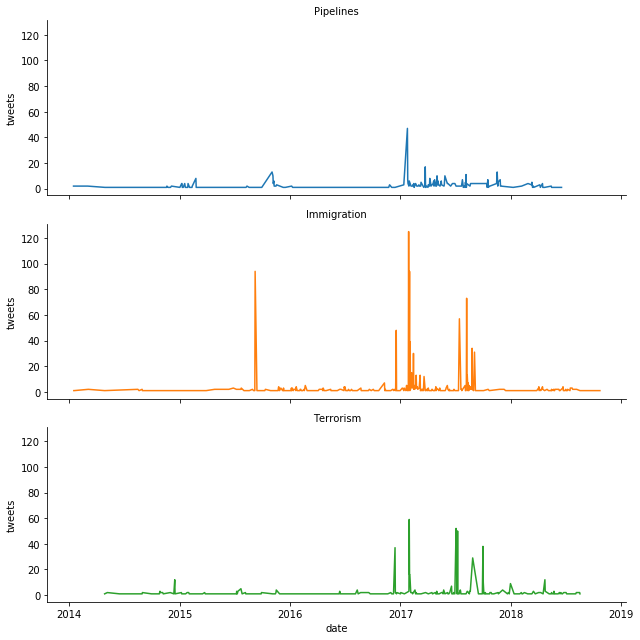

In [558]:
import seaborn as sns

( sns.FacetGrid(issue_volumes, col='issue', col_wrap= 1, hue = 'issue', size=3, aspect=3)
   .map(plt.plot, 'date', 'tweets').set_titles('{col_name}')
)

Sort the table of tweets by issue to see the most active data for each.

In [545]:
issue_volumes.sort_values('tweets', ascending=False).head(20)

,date,issue,tweets
387,2017-01-28,Immigration,125.0
394,2017-01-31,Immigration,94.0
147,2015-09-08,Immigration,94.0
602,2017-08-08,Immigration,73.0
393,2017-01-30,Terror,59.0
577,2017-07-15,Immigration,57.0
566,2017-07-04,Terror,52.0
570,2017-07-09,Terror,50.0
567,2017-07-05,Terror,50.0
363,2016-12-18,Immigration,48.0


A sample of tweets that mention the QAnon conspiracy theory.

In [5]:
cantwt[cantwt.tweet_text.str.contains('qanon', case = False)].tweet_text.sample(10)

25093             RT @Awakentothyself: #QAnon #FakeNews #SaveOntario #TreasonousTrudeau\n\nLook how corrupt our government is.  They removed Jack MacLaren for…
217004             RT @Canada4Bernie: #QAnon #FollowTheWhiteRabbit - POTUS describes Strzok's actions as Treason: “A man is tweeting to his lover that if [Cli…
853091            RT @gooomega: btw guys, #QAnon said to not lose focus on Loop Capital.\nGuess what? Your chinese in Alberta don't need pipelines but TRAINS.…
34987                     RT @michellecoats68: #QAnon #BrendenDilley INTEL DROPS!! Canada on USA Radar ?Are we being DU... https://t.co/Kpbf0Yk4Xi via @YouTube
34888     RT @Crazy_Eh: #Q\n#WEQ\n#JFK\n#Qanon\n#WeThePEOPLE\n#StayTOGETHER\n#StaySTRONG\n#WWG1WGA\n@POTUS \n@realDonaldTrump @JustinTrudeau https://t.co/URil…
33955              RT @Canada4Bernie: ☄️💫 #FollowTheWhiteRabbit #QAnon "The US mainstream propaganda media has yet to inform the American people that... https…
36974              RT @Canada4Bernie: #R